# **Time Domain Feature And Hand Movement**

## 0. Start

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

## 1.Load and Process data (EEG and Hand Movement)

In [3]:
df_time=pd.read_csv("/content/drive/MyDrive/MLMA Project/BS-HMS-Dataset/time_domain_features")

In [4]:
# Drop participant 20, 21 ,27 that contains NA
rows_to_drop = ['Test20', 'Test21', 'Test27']
df_time_filtered = df_time[~df_time['Test'].str.contains('|'.join(rows_to_drop))]
df_time_filtered

,Unnamed: 0,AF3_mean,AF3_std,AF3_var,AF3_median,AF3_min,AF3_max,AF3_activity,AF3_mobility,AF3_complexity,...,AF4_max,AF4_activity,AF4_mobility,AF4_complexity,AF4_ar_coeff_0,AF4_ar_coeff_1,AF4_ar_coeff_2,AF4_ar_coeff_3,AF4_ar_coeff_4,Test
0,0,4233.422687,43.471805,1889.797801,4231.794922,3241.025635,4429.230469,1889.797801,0.212561,5.546035,...,4798.461426,1955.207164,0.201175,5.853881,1.888919,-1.916397,1.774889,-1.162047,0.414635,EEG_Test0_1
1,1,4231.008787,44.189663,1952.726344,4229.743652,3387.692139,5505.127930,1952.726344,0.269354,4.519996,...,5405.641113,4047.042955,0.181730,6.655339,1.869903,-1.917447,1.803922,-1.177878,0.421499,EEG_Test0_2
2,2,4235.494381,25.175706,633.816192,4233.846191,3968.205078,4438.974121,633.816192,0.379098,3.379011,...,4456.922852,788.581256,0.362081,3.528739,1.719312,-1.716449,1.651069,-1.060818,0.406884,EEG_Test0_3
3,3,4237.481215,86.477155,7478.298389,4236.922852,3529.743408,5739.486816,7478.298389,0.111843,11.086097,...,7725.640625,30770.363380,0.065568,16.047249,2.014694,-1.962541,1.826205,-1.251982,0.373620,EEG_Test0_4
4,4,4233.419821,34.626376,1198.985906,4230.769043,3809.230713,4543.589844,1198.985906,0.264964,4.459335,...,5711.794922,9459.787110,0.097349,11.212047,1.916121,-1.784461,1.639423,-1.070856,0.299771,EEG_Test0_5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,211,4239.671983,97.882280,9580.940701,4237.948730,759.487183,4835.384277,9580.940701,0.106721,10.789804,...,4534.358887,1341.930166,0.288382,4.671318,1.619370,-1.575834,1.591902,-1.013965,0.378527,EEG_Test26_4
212,212,4229.912101,50.426474,2542.829266,4228.205078,3890.256348,4543.076660,2542.829266,0.105597,11.185909,...,4649.230469,2125.336360,0.194158,6.114867,1.799081,-1.684543,1.536058,-0.908229,0.257632,EEG_Test26_5
213,213,4234.076193,32.293637,1042.878960,4234.871582,4091.281982,4401.025391,1042.878960,0.171739,7.219231,...,5397.948730,4823.841089,0.127178,9.549253,1.850852,-1.822298,1.738571,-1.141967,0.374842,EEG_Test26_6
214,214,4236.514296,21.179939,448.589826,4236.410156,4070.769043,4437.435547,448.589826,0.276163,4.529806,...,4794.358887,1804.680486,0.212828,5.879350,1.683692,-1.604122,1.484709,-0.874587,0.310306,EEG_Test26_7


In [5]:
# Drop "Unnamed: 0","Test" columns
df_time_filtered=df_time_filtered.drop(columns=["Unnamed: 0","Test"], )
df_time_filtered = df_time_filtered.reset_index(drop=True)
df_time_filtered

,AF3_mean,AF3_std,AF3_var,AF3_median,AF3_min,AF3_max,AF3_activity,AF3_mobility,AF3_complexity,AF3_ar_coeff_0,...,AF4_min,AF4_max,AF4_activity,AF4_mobility,AF4_complexity,AF4_ar_coeff_0,AF4_ar_coeff_1,AF4_ar_coeff_2,AF4_ar_coeff_3,AF4_ar_coeff_4
0,4233.422687,43.471805,1889.797801,4231.794922,3241.025635,4429.230469,1889.797801,0.212561,5.546035,1.886056,...,3336.410156,4798.461426,1955.207164,0.201175,5.853881,1.888919,-1.916397,1.774889,-1.162047,0.414635
1,4231.008787,44.189663,1952.726344,4229.743652,3387.692139,5505.127930,1952.726344,0.269354,4.519996,1.854385,...,3422.563965,5405.641113,4047.042955,0.181730,6.655339,1.869903,-1.917447,1.803922,-1.177878,0.421499
2,4235.494381,25.175706,633.816192,4233.846191,3968.205078,4438.974121,633.816192,0.379098,3.379011,1.709990,...,3976.923096,4456.922852,788.581256,0.362081,3.528739,1.719312,-1.716449,1.651069,-1.060818,0.406884
3,4237.481215,86.477155,7478.298389,4236.922852,3529.743408,5739.486816,7478.298389,0.111843,11.086097,1.798939,...,2852.307617,7725.640625,30770.363380,0.065568,16.047249,2.014694,-1.962541,1.826205,-1.251982,0.373620
4,4233.419821,34.626376,1198.985906,4230.769043,3809.230713,4543.589844,1198.985906,0.264964,4.459335,1.864686,...,3692.820312,5711.794922,9459.787110,0.097349,11.212047,1.916121,-1.784461,1.639423,-1.070856,0.299771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,4239.671983,97.882280,9580.940701,4237.948730,759.487183,4835.384277,9580.940701,0.106721,10.789804,1.931506,...,3763.076904,4534.358887,1341.930166,0.288382,4.671318,1.619370,-1.575834,1.591902,-1.013965,0.378527
196,4229.912101,50.426474,2542.829266,4228.205078,3890.256348,4543.076660,2542.829266,0.105597,11.185909,1.850163,...,4018.974365,4649.230469,2125.336360,0.194158,6.114867,1.799081,-1.684543,1.536058,-0.908229,0.257632
197,4234.076193,32.293637,1042.878960,4234.871582,4091.281982,4401.025391,1042.878960,0.171739,7.219231,1.768337,...,3799.487061,5397.948730,4823.841089,0.127178,9.549253,1.850852,-1.822298,1.738571,-1.141967,0.374842
198,4236.514296,21.179939,448.589826,4236.410156,4070.769043,4437.435547,448.589826,0.276163,4.529806,1.562347,...,3829.743408,4794.358887,1804.680486,0.212828,5.879350,1.683692,-1.604122,1.484709,-0.874587,0.310306


In [6]:
# Load mega data
metadata=pd.read_excel("/content/drive/MyDrive/MLMA Project/BS-HMS-Dataset/Emotiv-based-Data/Demographic Details of Participants.xlsx")
metadata.columns=[
    "User ID", "Age", "Gender", "Dominant Hand", "Date / Time",
    "Video ID 1", "Video ID 2", "Date / Time", "Video ID 3", "Video ID 4"]
metadata

,User ID,Age,Gender,Dominant Hand,Date / Time,Video ID 1,Video ID 2,Date / Time,Video ID 3,Video ID 4
0,Test0,27,Male,Right,08/18/2019/2:00:00 PM,15,8,08/23/2019/3:40:00 PM,2.0,11.0
1,Test1,24,Male,Right,08/18/2019/3:20:00 PM,5,5,08/22/2019/4:30:00 PM,9.0,5.0
2,test2,30,Female,Right,08/19/2019/4:20:00 PM,8,11,08/20/2019/4:40:00 PM,5.0,2.0
3,test3,25,Male,Right,08/20/2019/1:28:00 PM,14,7,08/28/2019/3:15:00 PM,15.0,1.0
4,test4,24,Male,Left,08/21/2019/3:20:00 PM,12,6,08/30/2019/5:10:00 PM,15.0,19.0
5,test5,27,Male,Right,08/22/2019/3:15:00 PM,5,15,09/13/2019/4:25:00 PM,1.0,19.0
6,test6,25,Male,Right,08/23/2019/1:55:00 PM,9,12,09/04/2019/4:50:00 PM,12.0,9.0
7,test7,27,Female,Right,08/23/2019/2:50:00 PM,1,14,09/04/2019/5:30:00 PM,10.0,8.0
8,test8,24,Female,Right,08/25/2019/12:50:00 PM,7,12,09.25/2019/4:45:00 PM,1.0,10.0
9,test9,20,Male,Right,08/28/2019/2:00:00 PM,9,11,09/04/2019/6:50:00 PM,11.0,16.0


In [7]:
# Drop na rows and show only video ids.
metadata_video_id=metadata[["User ID","Video ID 1", "Video ID 2", "Video ID 3", "Video ID 4"]]
metadata_video_id=metadata_video_id.dropna()
metadata_video_id

,User ID,Video ID 1,Video ID 2,Video ID 3,Video ID 4
0,Test0,15,8,2.0,11.0
1,Test1,5,5,9.0,5.0
2,test2,8,11,5.0,2.0
3,test3,14,7,15.0,1.0
4,test4,12,6,15.0,19.0
5,test5,5,15,1.0,19.0
6,test6,9,12,12.0,9.0
7,test7,1,14,10.0,8.0
8,test8,7,12,1.0,10.0
9,test9,9,11,11.0,16.0


In [8]:
# Hand Movement Data Loading and Processing
df_rhm_acc = pd.read_csv("/content/drive/MyDrive/MLMA Project/BS-HMS-Dataset/Emotiv_Right_acc_extracted.csv")
df_rhm_gyro= pd.read_csv("/content/drive/MyDrive/MLMA Project/BS-HMS-Dataset/Emotiv_Right_gyro_extracted.csv")
# Manualy add '_gyro' and '_acc' to the feature names to differenciate.
def add_suffix_to_feature_names(df, suffix):
    new_column_names = {col: col + suffix for col in df.columns}
    return df.rename(columns=new_column_names)

df_rhm_acc = add_suffix_to_feature_names(df_rhm_acc, '_acc')
df_rhm_gyro = add_suffix_to_feature_names(df_rhm_gyro, '_gyro')
df_rhm_acc=df_rhm_acc.drop(columns=["Filename_Part_acc"])
df_rhm_gyro=df_rhm_gyro.drop(columns=["Filename_Part_gyro"])
df_rhm = pd.concat([df_rhm_acc, df_rhm_gyro], axis = 1)
df_rhm

,X_mean_acc,X_std_acc,X_var_acc,X_median_acc,X_min_acc,X_max_acc,X_activity_acc,X_mobility_acc,X_complexity_acc,X_ar_coeff_0_acc,...,Z_ACF1_gyro,Z_ACF2_gyro,Z_Grad1mean_gyro,Z_Grad1std_gyro,Z_Grad1var_gyro,Z_Grad2mean_gyro,Z_Grad2std_gyro,Z_Grad2var_gyro,Z_SEntropy_gyro,All_SMV_gyro
0,-6.846076,1.127397,1.271024,-7.291028,-9.866585,3.020774,1.271024,0.033221,41.360217,1.039849,...,-0.282172,0.049478,1.317114e-06,0.006302,0.000040,-2.942488e-07,0.002580,0.000007,3.901216,0.067171
1,2.378614,0.445303,0.198294,2.427151,-15.984729,19.594337,0.198294,0.283186,3.950224,1.344210,...,0.006878,-0.021570,-3.791419e-07,0.018311,0.000335,9.977444e-09,0.008738,0.000076,5.299957,0.135881
2,-4.600323,1.208001,1.459265,-4.332489,-8.411251,2.436726,1.459265,0.029166,48.092388,1.015230,...,0.027719,-0.066030,2.087315e-07,0.003741,0.000014,2.087315e-07,0.001756,0.000003,3.767423,0.039921
3,2.307475,0.842399,0.709637,2.494173,-5.548458,6.352721,0.709637,0.108667,10.930011,1.282584,...,0.021337,-0.182476,5.823871e-08,0.011482,0.000132,1.164774e-07,0.005286,0.000028,5.899198,0.157682
4,-0.876954,0.603183,0.363829,-1.010116,-5.711226,2.800559,0.363829,0.072352,16.832129,1.235047,...,0.000851,0.008886,-2.100619e-06,0.006216,0.000039,5.410685e-07,0.002682,0.000007,2.802608,0.047825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-1.026608,0.673073,0.453027,-0.895221,-7.166558,4.294190,0.453027,0.190876,6.090877,1.327769,...,-0.101010,0.004093,2.519509e-06,0.021359,0.000456,-1.619685e-07,0.009887,0.000098,6.740643,0.214154
196,0.855077,0.705780,0.498126,0.684581,-2.963326,16.674097,0.498126,0.117301,10.614548,1.285143,...,-0.012828,-0.038737,-9.003508e-08,0.011652,0.000136,-4.951929e-07,0.005225,0.000027,3.689207,0.062542
197,1.761846,0.449221,0.201799,1.766506,-3.710142,6.534637,0.201799,0.241573,5.045190,1.340544,...,-0.001342,0.045436,3.601153e-07,0.012731,0.000162,4.801537e-07,0.006654,0.000044,6.276326,0.194280
198,-0.530926,1.917458,3.676647,-0.694156,-11.762347,10.220843,3.676647,0.049494,22.914340,1.349513,...,-0.031774,-0.098687,4.529143e-07,0.015796,0.000250,-1.171670e-06,0.007516,0.000056,5.348136,0.188279


In [9]:
# Concatenate Hand Movement and EEG
df_time_hm = pd.concat([df_time_filtered, df_rhm], axis = 1)
df_time_hm

,AF3_mean,AF3_std,AF3_var,AF3_median,AF3_min,AF3_max,AF3_activity,AF3_mobility,AF3_complexity,AF3_ar_coeff_0,...,Z_ACF1_gyro,Z_ACF2_gyro,Z_Grad1mean_gyro,Z_Grad1std_gyro,Z_Grad1var_gyro,Z_Grad2mean_gyro,Z_Grad2std_gyro,Z_Grad2var_gyro,Z_SEntropy_gyro,All_SMV_gyro
0,4233.422687,43.471805,1889.797801,4231.794922,3241.025635,4429.230469,1889.797801,0.212561,5.546035,1.886056,...,-0.282172,0.049478,1.317114e-06,0.006302,0.000040,-2.942488e-07,0.002580,0.000007,3.901216,0.067171
1,4231.008787,44.189663,1952.726344,4229.743652,3387.692139,5505.127930,1952.726344,0.269354,4.519996,1.854385,...,0.006878,-0.021570,-3.791419e-07,0.018311,0.000335,9.977444e-09,0.008738,0.000076,5.299957,0.135881
2,4235.494381,25.175706,633.816192,4233.846191,3968.205078,4438.974121,633.816192,0.379098,3.379011,1.709990,...,0.027719,-0.066030,2.087315e-07,0.003741,0.000014,2.087315e-07,0.001756,0.000003,3.767423,0.039921
3,4237.481215,86.477155,7478.298389,4236.922852,3529.743408,5739.486816,7478.298389,0.111843,11.086097,1.798939,...,0.021337,-0.182476,5.823871e-08,0.011482,0.000132,1.164774e-07,0.005286,0.000028,5.899198,0.157682
4,4233.419821,34.626376,1198.985906,4230.769043,3809.230713,4543.589844,1198.985906,0.264964,4.459335,1.864686,...,0.000851,0.008886,-2.100619e-06,0.006216,0.000039,5.410685e-07,0.002682,0.000007,2.802608,0.047825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,4239.671983,97.882280,9580.940701,4237.948730,759.487183,4835.384277,9580.940701,0.106721,10.789804,1.931506,...,-0.101010,0.004093,2.519509e-06,0.021359,0.000456,-1.619685e-07,0.009887,0.000098,6.740643,0.214154
196,4229.912101,50.426474,2542.829266,4228.205078,3890.256348,4543.076660,2542.829266,0.105597,11.185909,1.850163,...,-0.012828,-0.038737,-9.003508e-08,0.011652,0.000136,-4.951929e-07,0.005225,0.000027,3.689207,0.062542
197,4234.076193,32.293637,1042.878960,4234.871582,4091.281982,4401.025391,1042.878960,0.171739,7.219231,1.768337,...,-0.001342,0.045436,3.601153e-07,0.012731,0.000162,4.801537e-07,0.006654,0.000044,6.276326,0.194280
198,4236.514296,21.179939,448.589826,4236.410156,4070.769043,4437.435547,448.589826,0.276163,4.529806,1.562347,...,-0.031774,-0.098687,4.529143e-07,0.015796,0.000250,-1.171670e-06,0.007516,0.000056,5.348136,0.188279


In [10]:
# Add Emotion column
metadata_video_id_list = metadata_video_id.drop('User ID', axis=1).values.flatten().tolist()
metadata_video_id_list = [int(item) for item in metadata_video_id_list for _ in range(2)] #to int and double the time
metadata_video_id_list = [1 if item in [1,2,5,6,13,14,15,16,17,18] else 0 for item in metadata_video_id_list] #map
df_time_hm["Emotion"]=metadata_video_id_list
df_time_hm

,AF3_mean,AF3_std,AF3_var,AF3_median,AF3_min,AF3_max,AF3_activity,AF3_mobility,AF3_complexity,AF3_ar_coeff_0,...,Z_ACF2_gyro,Z_Grad1mean_gyro,Z_Grad1std_gyro,Z_Grad1var_gyro,Z_Grad2mean_gyro,Z_Grad2std_gyro,Z_Grad2var_gyro,Z_SEntropy_gyro,All_SMV_gyro,Emotion
0,4233.422687,43.471805,1889.797801,4231.794922,3241.025635,4429.230469,1889.797801,0.212561,5.546035,1.886056,...,0.049478,1.317114e-06,0.006302,0.000040,-2.942488e-07,0.002580,0.000007,3.901216,0.067171,1
1,4231.008787,44.189663,1952.726344,4229.743652,3387.692139,5505.127930,1952.726344,0.269354,4.519996,1.854385,...,-0.021570,-3.791419e-07,0.018311,0.000335,9.977444e-09,0.008738,0.000076,5.299957,0.135881,1
2,4235.494381,25.175706,633.816192,4233.846191,3968.205078,4438.974121,633.816192,0.379098,3.379011,1.709990,...,-0.066030,2.087315e-07,0.003741,0.000014,2.087315e-07,0.001756,0.000003,3.767423,0.039921,0
3,4237.481215,86.477155,7478.298389,4236.922852,3529.743408,5739.486816,7478.298389,0.111843,11.086097,1.798939,...,-0.182476,5.823871e-08,0.011482,0.000132,1.164774e-07,0.005286,0.000028,5.899198,0.157682,0
4,4233.419821,34.626376,1198.985906,4230.769043,3809.230713,4543.589844,1198.985906,0.264964,4.459335,1.864686,...,0.008886,-2.100619e-06,0.006216,0.000039,5.410685e-07,0.002682,0.000007,2.802608,0.047825,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,4239.671983,97.882280,9580.940701,4237.948730,759.487183,4835.384277,9580.940701,0.106721,10.789804,1.931506,...,0.004093,2.519509e-06,0.021359,0.000456,-1.619685e-07,0.009887,0.000098,6.740643,0.214154,1
196,4229.912101,50.426474,2542.829266,4228.205078,3890.256348,4543.076660,2542.829266,0.105597,11.185909,1.850163,...,-0.038737,-9.003508e-08,0.011652,0.000136,-4.951929e-07,0.005225,0.000027,3.689207,0.062542,0
197,4234.076193,32.293637,1042.878960,4234.871582,4091.281982,4401.025391,1042.878960,0.171739,7.219231,1.768337,...,0.045436,3.601153e-07,0.012731,0.000162,4.801537e-07,0.006654,0.000044,6.276326,0.194280,0
198,4236.514296,21.179939,448.589826,4236.410156,4070.769043,4437.435547,448.589826,0.276163,4.529806,1.562347,...,-0.098687,4.529143e-07,0.015796,0.000250,-1.171670e-06,0.007516,0.000056,5.348136,0.188279,1


## 2. Train Test Split

In [11]:
# Assign ID for each participant.
folder = [num for num in range(1, 26) for _ in range(8)]
df_time_hm["Folder"]=folder
df_time_hm

,AF3_mean,AF3_std,AF3_var,AF3_median,AF3_min,AF3_max,AF3_activity,AF3_mobility,AF3_complexity,AF3_ar_coeff_0,...,Z_Grad1mean_gyro,Z_Grad1std_gyro,Z_Grad1var_gyro,Z_Grad2mean_gyro,Z_Grad2std_gyro,Z_Grad2var_gyro,Z_SEntropy_gyro,All_SMV_gyro,Emotion,Folder
0,4233.422687,43.471805,1889.797801,4231.794922,3241.025635,4429.230469,1889.797801,0.212561,5.546035,1.886056,...,1.317114e-06,0.006302,0.000040,-2.942488e-07,0.002580,0.000007,3.901216,0.067171,1,1
1,4231.008787,44.189663,1952.726344,4229.743652,3387.692139,5505.127930,1952.726344,0.269354,4.519996,1.854385,...,-3.791419e-07,0.018311,0.000335,9.977444e-09,0.008738,0.000076,5.299957,0.135881,1,1
2,4235.494381,25.175706,633.816192,4233.846191,3968.205078,4438.974121,633.816192,0.379098,3.379011,1.709990,...,2.087315e-07,0.003741,0.000014,2.087315e-07,0.001756,0.000003,3.767423,0.039921,0,1
3,4237.481215,86.477155,7478.298389,4236.922852,3529.743408,5739.486816,7478.298389,0.111843,11.086097,1.798939,...,5.823871e-08,0.011482,0.000132,1.164774e-07,0.005286,0.000028,5.899198,0.157682,0,1
4,4233.419821,34.626376,1198.985906,4230.769043,3809.230713,4543.589844,1198.985906,0.264964,4.459335,1.864686,...,-2.100619e-06,0.006216,0.000039,5.410685e-07,0.002682,0.000007,2.802608,0.047825,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,4239.671983,97.882280,9580.940701,4237.948730,759.487183,4835.384277,9580.940701,0.106721,10.789804,1.931506,...,2.519509e-06,0.021359,0.000456,-1.619685e-07,0.009887,0.000098,6.740643,0.214154,1,25
196,4229.912101,50.426474,2542.829266,4228.205078,3890.256348,4543.076660,2542.829266,0.105597,11.185909,1.850163,...,-9.003508e-08,0.011652,0.000136,-4.951929e-07,0.005225,0.000027,3.689207,0.062542,0,25
197,4234.076193,32.293637,1042.878960,4234.871582,4091.281982,4401.025391,1042.878960,0.171739,7.219231,1.768337,...,3.601153e-07,0.012731,0.000162,4.801537e-07,0.006654,0.000044,6.276326,0.194280,0,25
198,4236.514296,21.179939,448.589826,4236.410156,4070.769043,4437.435547,448.589826,0.276163,4.529806,1.562347,...,4.529143e-07,0.015796,0.000250,-1.171670e-06,0.007516,0.000056,5.348136,0.188279,1,25


In [12]:
# to make sure No Data Leakage
import random
folder_names = [i for i in range(1, 26)]

# Shuffle the folder names to ensure random distribution
random.shuffle(folder_names)

# Calculate the indices for the 80-20 split
train_split = int(0.8 * len(folder_names))

# Split the folders into training and testing sets
train_folders = folder_names[:train_split]
test_folders = folder_names[train_split:]

print(train_folders)
print(test_folders)

[23, 25, 20, 13, 6, 17, 8, 1, 22, 9, 18, 16, 21, 10, 5, 24, 14, 2, 12, 19]
[15, 11, 3, 4, 7]


In [13]:
train_time = df_time_hm[df_time_hm['Folder'].isin(train_folders)]
X_train_time =train_time.iloc[:,:-2]
y_train_time=train_time.iloc[:,-2]

test_time = df_time_hm[df_time_hm['Folder'].isin(test_folders)]
X_test_time =test_time.iloc[:,:-2]
y_test_time=test_time.iloc[:,-2]


In [14]:
train_time

,AF3_mean,AF3_std,AF3_var,AF3_median,AF3_min,AF3_max,AF3_activity,AF3_mobility,AF3_complexity,AF3_ar_coeff_0,...,Z_Grad1mean_gyro,Z_Grad1std_gyro,Z_Grad1var_gyro,Z_Grad2mean_gyro,Z_Grad2std_gyro,Z_Grad2var_gyro,Z_SEntropy_gyro,All_SMV_gyro,Emotion,Folder
0,4233.422687,43.471805,1889.797801,4231.794922,3241.025635,4429.230469,1889.797801,0.212561,5.546035,1.886056,...,1.317114e-06,0.006302,0.000040,-2.942488e-07,0.002580,0.000007,3.901216,0.067171,1,1
1,4231.008787,44.189663,1952.726344,4229.743652,3387.692139,5505.127930,1952.726344,0.269354,4.519996,1.854385,...,-3.791419e-07,0.018311,0.000335,9.977444e-09,0.008738,0.000076,5.299957,0.135881,1,1
2,4235.494381,25.175706,633.816192,4233.846191,3968.205078,4438.974121,633.816192,0.379098,3.379011,1.709990,...,2.087315e-07,0.003741,0.000014,2.087315e-07,0.001756,0.000003,3.767423,0.039921,0,1
3,4237.481215,86.477155,7478.298389,4236.922852,3529.743408,5739.486816,7478.298389,0.111843,11.086097,1.798939,...,5.823871e-08,0.011482,0.000132,1.164774e-07,0.005286,0.000028,5.899198,0.157682,0,1
4,4233.419821,34.626376,1198.985906,4230.769043,3809.230713,4543.589844,1198.985906,0.264964,4.459335,1.864686,...,-2.100619e-06,0.006216,0.000039,5.410685e-07,0.002682,0.000007,2.802608,0.047825,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,4239.671983,97.882280,9580.940701,4237.948730,759.487183,4835.384277,9580.940701,0.106721,10.789804,1.931506,...,2.519509e-06,0.021359,0.000456,-1.619685e-07,0.009887,0.000098,6.740643,0.214154,1,25
196,4229.912101,50.426474,2542.829266,4228.205078,3890.256348,4543.076660,2542.829266,0.105597,11.185909,1.850163,...,-9.003508e-08,0.011652,0.000136,-4.951929e-07,0.005225,0.000027,3.689207,0.062542,0,25
197,4234.076193,32.293637,1042.878960,4234.871582,4091.281982,4401.025391,1042.878960,0.171739,7.219231,1.768337,...,3.601153e-07,0.012731,0.000162,4.801537e-07,0.006654,0.000044,6.276326,0.194280,0,25
198,4236.514296,21.179939,448.589826,4236.410156,4070.769043,4437.435547,448.589826,0.276163,4.529806,1.562347,...,4.529143e-07,0.015796,0.000250,-1.171670e-06,0.007516,0.000056,5.348136,0.188279,1,25


In [15]:
test_time

,AF3_mean,AF3_std,AF3_var,AF3_median,AF3_min,AF3_max,AF3_activity,AF3_mobility,AF3_complexity,AF3_ar_coeff_0,...,Z_Grad1mean_gyro,Z_Grad1std_gyro,Z_Grad1var_gyro,Z_Grad2mean_gyro,Z_Grad2std_gyro,Z_Grad2var_gyro,Z_SEntropy_gyro,All_SMV_gyro,Emotion,Folder
16,4237.360973,11.958514,143.006069,4234.871582,4180.000000,4414.358887,143.006069,0.447188,2.884642,1.693652,...,1.144248e-06,0.003092,0.000010,-3.273322e-14,0.001415,0.000002,2.810777,0.018408,0,3
17,4238.163760,14.548876,211.669783,4236.410156,4164.102539,4515.897461,211.669783,0.387541,3.355587,1.675562,...,-1.621042e-06,0.017638,0.000311,-4.146852e-07,0.008967,0.000080,6.667625,0.194485,0,3
18,4239.537946,17.239960,297.216213,4237.436035,4165.127930,4501.025391,297.216213,0.384619,3.543686,1.520606,...,-8.413003e-16,0.005359,0.000029,4.481377e-08,0.002497,0.000006,3.994276,0.050545,0,3
19,4239.373674,11.528465,132.905505,4237.436035,4181.538574,4330.256348,132.905505,0.417303,3.089376,1.670433,...,2.790458e-07,0.016162,0.000261,1.694207e-07,0.008331,0.000069,7.200695,0.211981,0,3
20,4233.705357,14.292321,204.270454,4232.820312,4154.871582,4360.512695,204.270454,0.405514,2.937444,1.883187,...,6.941289e-07,0.003203,0.000010,-5.339453e-08,0.001614,0.000003,1.847244,0.018504,1,3
21,4236.195139,13.728272,188.465459,4234.871582,4135.384277,4342.051270,188.465459,0.388458,3.156465,1.805091,...,-2.663053e-07,0.033242,0.001105,1.686600e-07,0.015283,0.000234,8.683811,0.408185,1,3
22,4238.735933,16.015136,256.484591,4236.410156,4108.717773,4510.256348,256.484591,0.402621,3.024307,1.855304,...,2.037526e-06,0.005171,0.000027,3.769423e-07,0.002032,0.000004,1.883577,0.026405,1,3
23,4238.738124,16.555656,274.089744,4237.436035,3847.179443,4412.307617,274.089744,0.369025,3.354295,1.778859,...,1.662296e-07,0.045139,0.002038,-2.805125e-07,0.023262,0.000541,8.634053,0.436524,1,3
24,4234.813593,23.788228,565.879808,4234.871582,3918.461426,4357.435547,565.879808,0.196743,6.324507,1.730065,...,3.265865e-06,0.022508,0.000507,9.416179e-07,0.013107,0.000172,3.814132,0.102422,1,4
25,4237.556211,20.078553,403.148276,4236.410156,4119.487305,4389.743652,403.148276,0.239374,5.010254,1.809776,...,1.050768e-06,0.015719,0.000247,6.567298e-07,0.006535,0.000043,5.957837,0.221273,1,4


## 3. CNN + Cross Validation

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import LambdaCallback
from sklearn.metrics import accuracy_score
from tensorflow.keras.layers import Conv2D,Conv1D, MaxPooling2D,MaxPooling1D, Flatten

# CNN construction, 2 1D conv layer, 2 dense layer with one dropout layer
def create_cnn_model(input_length):
    model = Sequential([
        Conv1D(32, 3, activation='relu', input_shape=(input_length,1)),
        MaxPooling1D(2),
        Conv1D(64, 3, activation='relu'),
        MaxPooling1D(2),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


batch_size=64

In [29]:
X_train_time.shape

(160, 348)

In [30]:
# Initialize variables
fold = 10
cv_scores = []
best_model_time = None
best_accuracy_time = 0

for i in range(fold):
    # Shuffle the folder names to ensure random distribution
    random.shuffle(train_folders)

    # Calculate the indices for the 90-10 split
    train_split_cv = int(0.9 * len(train_folders))

    # Split the folders into training and validation
    train_folders_cv = train_folders[:train_split_cv]
    val_folders_cv = train_folders[train_split_cv:]

    # Filter data based on the folder names
    train_cv = train_time[train_time['Folder'].isin(train_folders_cv)]
    X_train_cv = train_cv.iloc[:, :-2]
    y_train_cv = train_cv.iloc[:, -2]

    val_cv = train_time[train_time['Folder'].isin(val_folders_cv)]
    X_val_cv = val_cv.iloc[:, :-2]
    y_val_cv = val_cv.iloc[:, -2]

    # Define the model
    model_time = create_cnn_model(X_train_cv.shape[1])

    # Create a custom callback to print loss and accuracy every 20 epochs
    print_callback = LambdaCallback(on_epoch_end=lambda epoch, logs:
                                    print(f"Epoch: {epoch+1}, Loss: {logs['loss']:.4f}, Accuracy: {logs['accuracy']:.4f}")
                                    if (epoch+1) % 20 == 0 else None)

    # Train the model
    history = model_time.fit(X_train_cv, y_train_cv,
                             epochs=100,
                             batch_size=batch_size,
                             verbose=0,
                             callbacks=[print_callback],
                             validation_data=(X_val_cv, y_val_cv))

    # Evaluate the model on the validation set
    val_predictions = (model_time.predict(X_val_cv) > 0.5).astype("int32")
    val_accuracy = accuracy_score(y_val_cv, val_predictions)
    cv_scores.append(val_accuracy)
    print(f"Fold completed. Validation accuracy: {val_accuracy * 100:.2f}%")

    # Check if the current model has the best accuracy
    if val_accuracy > best_accuracy_time:
        best_accuracy_time = val_accuracy
        best_model_time = model_time

# Report the best accuracy found
print(f"Best validation accuracy: {best_accuracy_time * 100:.2f}%")

Epoch: 20, Loss: 0.6687, Accuracy: 0.5694
Epoch: 40, Loss: 0.6633, Accuracy: 0.5694
Epoch: 60, Loss: 0.6575, Accuracy: 0.5764
Epoch: 80, Loss: 0.6519, Accuracy: 0.5833
Epoch: 100, Loss: 0.6709, Accuracy: 0.5625
1/1 [==============================] - 0s 205ms/step
Fold completed. Validation accuracy: 68.75%
Epoch: 20, Loss: 2.2767, Accuracy: 0.5972
Epoch: 40, Loss: 2.1640, Accuracy: 0.5764
Epoch: 60, Loss: 0.6348, Accuracy: 0.5625
Epoch: 80, Loss: 0.6480, Accuracy: 0.5486
Epoch: 100, Loss: 0.6161, Accuracy: 0.5625
1/1 [==============================] - 0s 108ms/step
Fold completed. Validation accuracy: 75.00%
Epoch: 20, Loss: 0.6301, Accuracy: 0.5903
Epoch: 40, Loss: 0.6197, Accuracy: 0.5972
Epoch: 60, Loss: 0.6190, Accuracy: 0.5972
Epoch: 80, Loss: 0.6289, Accuracy: 0.5764
Epoch: 100, Loss: 0.6078, Accuracy: 0.6111
1/1 [==============================] - 0s 96ms/step
Fold completed. Validation accuracy: 62.50%
Epoch: 20, Loss: 0.6412, Accuracy: 0.5069
Epoch: 40, Loss: 0.6305, Accuracy: 

Epoch: 100, Loss: 0.6483, Accuracy: 0.5972
1/1 [==============================] - 0s 102ms/step
Fold completed. Validation accuracy: 62.50%
Epoch: 20, Loss: 0.6295, Accuracy: 0.6042
Epoch: 40, Loss: 0.6417, Accuracy: 0.5833
Epoch: 60, Loss: 0.6024, Accuracy: 0.5972
Epoch: 80, Loss: 0.5996, Accuracy: 0.5903


Epoch: 100, Loss: 0.6146, Accuracy: 0.5764
1/1 [==============================] - 0s 96ms/step
Fold completed. Validation accuracy: 56.25%
Epoch: 20, Loss: 0.6878, Accuracy: 0.5486
Epoch: 40, Loss: 0.6822, Accuracy: 0.5556
Epoch: 60, Loss: 0.6866, Accuracy: 0.5486
Epoch: 80, Loss: 0.6862, Accuracy: 0.5486
Epoch: 100, Loss: 0.6908, Accuracy: 0.5417
1/1 [==============================] - 0s 110ms/step
Fold completed. Validation accuracy: 62.50%
Epoch: 20, Loss: 0.6604, Accuracy: 0.5903
Epoch: 40, Loss: 0.6620, Accuracy: 0.5833
Epoch: 60, Loss: 0.6559, Accuracy: 0.5833
Epoch: 80, Loss: 0.6550, Accuracy: 0.5833
Epoch: 100, Loss: 0.6542, Accuracy: 0.5833
1/1 [==============================] - 0s 103ms/step
Fold completed. Validation accuracy: 50.00%
Epoch: 20, Loss: 0.6351, Accuracy: 0.5694
Epoch: 40, Loss: 0.6537, Accuracy: 0.5694
Epoch: 60, Loss: 0.6629, Accuracy: 0.5625
Epoch: 80, Loss: 0.6579, Accuracy: 0.5625
Epoch: 100, Loss: 0.6527, Accuracy: 0.5694
1/1 [=============================

In [ ]:
print(train_folders_cv)
print(val_folders_cv)

[18, 2, 11, 9, 14, 12, 7, 19, 17, 4, 13, 10, 1, 20, 15, 6, 5, 23]
[8, 21]


In [ ]:
print(f"Best validation accuracy: {best_accuracy_time * 100:.2f}%")

Best validation accuracy: 62.50%


# **Frequency Domain Feature And Hand Movement**

## 1. Load Data

In [ ]:
df_frequency=pd.read_csv("/content/drive/MyDrive/MLMA Project/BS-HMS-Dataset/frequency_domain_features")

In [ ]:
rows_to_drop = ['Test20', 'Test21', 'Test27']
df_frequency_filtered = df_frequency[~df_frequency['Test'].str.contains('|'.join(rows_to_drop))]
df_frequency_filtered = df_frequency_filtered.reset_index(drop=True)
# Drop "Unnamed: 0","Test" columns
df_frequency_filtered=df_frequency_filtered.drop(columns=["Unnamed: 0","Test"])
df_frequency_filtered

,AF3_Delta_power,AF3_Theta_power,AF3_Alpha_power,AF3_Beta_power,AF3_Gamma_power,AF3_spectral_entropy,F7_Delta_power,F7_Theta_power,F7_Alpha_power,F7_Beta_power,...,F8_Alpha_power,F8_Beta_power,F8_Gamma_power,F8_spectral_entropy,AF4_Delta_power,AF4_Theta_power,AF4_Alpha_power,AF4_Beta_power,AF4_Gamma_power,AF4_spectral_entropy
0,742.183654,91.890818,29.103071,39.086906,14.159668,3.392576,19380.110107,1675.854975,993.004181,1200.003919,...,2243.869658,1827.793507,372.815243,2.927640,722.066811,73.374318,26.934085,39.510158,12.868163,3.228577
1,814.217772,115.616427,33.692698,52.126272,22.004420,3.517422,2473.146474,137.999940,28.948250,35.874422,...,35.976256,50.502736,18.238877,3.321144,988.999364,104.930425,34.668521,50.649449,20.801604,2.722334
2,333.443681,56.892036,17.542342,37.008188,18.740256,4.115038,1400.052844,297.329986,160.979736,296.967472,...,254.636918,246.406774,58.009400,3.251759,439.611659,62.292803,21.426163,42.629270,21.327653,3.976593
3,972.444483,96.292971,21.770639,34.067561,19.333383,2.063286,15797.879384,1250.494293,492.593757,492.119875,...,165.243148,173.137554,37.285689,2.788485,6092.273632,235.566933,47.641229,44.089441,18.788212,2.098816
4,679.511986,114.487260,25.583073,32.942404,14.063132,3.881328,292.466213,38.358567,10.211787,19.628216,...,19.115841,36.050785,14.784819,3.466234,2339.739461,143.981679,26.881912,31.913806,12.180580,2.435904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,3988.090799,66.729897,26.714639,52.603418,17.757124,2.581967,1128.316705,100.116058,25.147104,78.176664,...,133.114646,101.401419,55.028680,2.829569,549.013560,50.597313,19.869369,32.719328,26.388016,3.308674
196,328.027554,24.065557,12.305281,11.390863,4.855920,2.003684,1214.553582,67.621555,24.157729,25.644321,...,21.999580,23.522324,10.241707,3.310003,806.514682,67.316092,34.419324,31.208080,14.308119,3.121754
197,196.552634,22.197301,10.330547,11.698973,5.910977,2.469211,2412.923177,94.241990,34.393498,61.537160,...,25.061109,33.520476,14.401712,2.614483,929.661063,66.896045,27.174102,28.494446,13.939820,2.230978
198,125.616279,14.811609,14.844813,13.978226,6.082713,3.141940,1198.985129,74.641414,33.214891,36.852710,...,16.653489,22.146428,11.727418,2.334435,346.849914,31.735962,34.137930,32.800019,15.050338,2.446117


In [ ]:
df_frequency_hm = pd.concat([df_frequency_filtered, df_rhm], axis = 1)
df_frequency_hm

,AF3_Delta_power,AF3_Theta_power,AF3_Alpha_power,AF3_Beta_power,AF3_Gamma_power,AF3_spectral_entropy,F7_Delta_power,F7_Theta_power,F7_Alpha_power,F7_Beta_power,...,Z_ACF1_gyro,Z_ACF2_gyro,Z_Grad1mean_gyro,Z_Grad1std_gyro,Z_Grad1var_gyro,Z_Grad2mean_gyro,Z_Grad2std_gyro,Z_Grad2var_gyro,Z_SEntropy_gyro,All_SMV_gyro
0,742.183654,91.890818,29.103071,39.086906,14.159668,3.392576,19380.110107,1675.854975,993.004181,1200.003919,...,-0.282172,0.049478,1.317114e-06,0.006302,0.000040,-2.942488e-07,0.002580,0.000007,3.901216,0.067171
1,814.217772,115.616427,33.692698,52.126272,22.004420,3.517422,2473.146474,137.999940,28.948250,35.874422,...,0.006878,-0.021570,-3.791419e-07,0.018311,0.000335,9.977444e-09,0.008738,0.000076,5.299957,0.135881
2,333.443681,56.892036,17.542342,37.008188,18.740256,4.115038,1400.052844,297.329986,160.979736,296.967472,...,0.027719,-0.066030,2.087315e-07,0.003741,0.000014,2.087315e-07,0.001756,0.000003,3.767423,0.039921
3,972.444483,96.292971,21.770639,34.067561,19.333383,2.063286,15797.879384,1250.494293,492.593757,492.119875,...,0.021337,-0.182476,5.823871e-08,0.011482,0.000132,1.164774e-07,0.005286,0.000028,5.899198,0.157682
4,679.511986,114.487260,25.583073,32.942404,14.063132,3.881328,292.466213,38.358567,10.211787,19.628216,...,0.000851,0.008886,-2.100619e-06,0.006216,0.000039,5.410685e-07,0.002682,0.000007,2.802608,0.047825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,3988.090799,66.729897,26.714639,52.603418,17.757124,2.581967,1128.316705,100.116058,25.147104,78.176664,...,-0.101010,0.004093,2.519509e-06,0.021359,0.000456,-1.619685e-07,0.009887,0.000098,6.740643,0.214154
196,328.027554,24.065557,12.305281,11.390863,4.855920,2.003684,1214.553582,67.621555,24.157729,25.644321,...,-0.012828,-0.038737,-9.003508e-08,0.011652,0.000136,-4.951929e-07,0.005225,0.000027,3.689207,0.062542
197,196.552634,22.197301,10.330547,11.698973,5.910977,2.469211,2412.923177,94.241990,34.393498,61.537160,...,-0.001342,0.045436,3.601153e-07,0.012731,0.000162,4.801537e-07,0.006654,0.000044,6.276326,0.194280
198,125.616279,14.811609,14.844813,13.978226,6.082713,3.141940,1198.985129,74.641414,33.214891,36.852710,...,-0.031774,-0.098687,4.529143e-07,0.015796,0.000250,-1.171670e-06,0.007516,0.000056,5.348136,0.188279


In [ ]:
# Add Emotion column
df_frequency_hm["Emotion"]=metadata_video_id_list

In [ ]:
df_frequency_hm

,AF3_Delta_power,AF3_Theta_power,AF3_Alpha_power,AF3_Beta_power,AF3_Gamma_power,AF3_spectral_entropy,F7_Delta_power,F7_Theta_power,F7_Alpha_power,F7_Beta_power,...,Z_ACF2_gyro,Z_Grad1mean_gyro,Z_Grad1std_gyro,Z_Grad1var_gyro,Z_Grad2mean_gyro,Z_Grad2std_gyro,Z_Grad2var_gyro,Z_SEntropy_gyro,All_SMV_gyro,Emotion
0,742.183654,91.890818,29.103071,39.086906,14.159668,3.392576,19380.110107,1675.854975,993.004181,1200.003919,...,0.049478,1.317114e-06,0.006302,0.000040,-2.942488e-07,0.002580,0.000007,3.901216,0.067171,1
1,814.217772,115.616427,33.692698,52.126272,22.004420,3.517422,2473.146474,137.999940,28.948250,35.874422,...,-0.021570,-3.791419e-07,0.018311,0.000335,9.977444e-09,0.008738,0.000076,5.299957,0.135881,1
2,333.443681,56.892036,17.542342,37.008188,18.740256,4.115038,1400.052844,297.329986,160.979736,296.967472,...,-0.066030,2.087315e-07,0.003741,0.000014,2.087315e-07,0.001756,0.000003,3.767423,0.039921,0
3,972.444483,96.292971,21.770639,34.067561,19.333383,2.063286,15797.879384,1250.494293,492.593757,492.119875,...,-0.182476,5.823871e-08,0.011482,0.000132,1.164774e-07,0.005286,0.000028,5.899198,0.157682,0
4,679.511986,114.487260,25.583073,32.942404,14.063132,3.881328,292.466213,38.358567,10.211787,19.628216,...,0.008886,-2.100619e-06,0.006216,0.000039,5.410685e-07,0.002682,0.000007,2.802608,0.047825,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,3988.090799,66.729897,26.714639,52.603418,17.757124,2.581967,1128.316705,100.116058,25.147104,78.176664,...,0.004093,2.519509e-06,0.021359,0.000456,-1.619685e-07,0.009887,0.000098,6.740643,0.214154,1
196,328.027554,24.065557,12.305281,11.390863,4.855920,2.003684,1214.553582,67.621555,24.157729,25.644321,...,-0.038737,-9.003508e-08,0.011652,0.000136,-4.951929e-07,0.005225,0.000027,3.689207,0.062542,0
197,196.552634,22.197301,10.330547,11.698973,5.910977,2.469211,2412.923177,94.241990,34.393498,61.537160,...,0.045436,3.601153e-07,0.012731,0.000162,4.801537e-07,0.006654,0.000044,6.276326,0.194280,0
198,125.616279,14.811609,14.844813,13.978226,6.082713,3.141940,1198.985129,74.641414,33.214891,36.852710,...,-0.098687,4.529143e-07,0.015796,0.000250,-1.171670e-06,0.007516,0.000056,5.348136,0.188279,1


## 2. Train Test Split

In [ ]:
# Assign Folder
df_frequency_hm["Folder"]=folder
df_frequency_hm

,AF3_Delta_power,AF3_Theta_power,AF3_Alpha_power,AF3_Beta_power,AF3_Gamma_power,AF3_spectral_entropy,F7_Delta_power,F7_Theta_power,F7_Alpha_power,F7_Beta_power,...,Z_Grad1mean_gyro,Z_Grad1std_gyro,Z_Grad1var_gyro,Z_Grad2mean_gyro,Z_Grad2std_gyro,Z_Grad2var_gyro,Z_SEntropy_gyro,All_SMV_gyro,Emotion,Folder
0,742.183654,91.890818,29.103071,39.086906,14.159668,3.392576,19380.110107,1675.854975,993.004181,1200.003919,...,1.317114e-06,0.006302,0.000040,-2.942488e-07,0.002580,0.000007,3.901216,0.067171,1,1
1,814.217772,115.616427,33.692698,52.126272,22.004420,3.517422,2473.146474,137.999940,28.948250,35.874422,...,-3.791419e-07,0.018311,0.000335,9.977444e-09,0.008738,0.000076,5.299957,0.135881,1,1
2,333.443681,56.892036,17.542342,37.008188,18.740256,4.115038,1400.052844,297.329986,160.979736,296.967472,...,2.087315e-07,0.003741,0.000014,2.087315e-07,0.001756,0.000003,3.767423,0.039921,0,1
3,972.444483,96.292971,21.770639,34.067561,19.333383,2.063286,15797.879384,1250.494293,492.593757,492.119875,...,5.823871e-08,0.011482,0.000132,1.164774e-07,0.005286,0.000028,5.899198,0.157682,0,1
4,679.511986,114.487260,25.583073,32.942404,14.063132,3.881328,292.466213,38.358567,10.211787,19.628216,...,-2.100619e-06,0.006216,0.000039,5.410685e-07,0.002682,0.000007,2.802608,0.047825,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,3988.090799,66.729897,26.714639,52.603418,17.757124,2.581967,1128.316705,100.116058,25.147104,78.176664,...,2.519509e-06,0.021359,0.000456,-1.619685e-07,0.009887,0.000098,6.740643,0.214154,1,25
196,328.027554,24.065557,12.305281,11.390863,4.855920,2.003684,1214.553582,67.621555,24.157729,25.644321,...,-9.003508e-08,0.011652,0.000136,-4.951929e-07,0.005225,0.000027,3.689207,0.062542,0,25
197,196.552634,22.197301,10.330547,11.698973,5.910977,2.469211,2412.923177,94.241990,34.393498,61.537160,...,3.601153e-07,0.012731,0.000162,4.801537e-07,0.006654,0.000044,6.276326,0.194280,0,25
198,125.616279,14.811609,14.844813,13.978226,6.082713,3.141940,1198.985129,74.641414,33.214891,36.852710,...,4.529143e-07,0.015796,0.000250,-1.171670e-06,0.007516,0.000056,5.348136,0.188279,1,25


In [ ]:
train_frequency = df_frequency_hm[df_frequency_hm['Folder'].isin(train_folders)]
X_train_frequency =train_frequency.iloc[:,:-2]
y_train_frequency=train_frequency.iloc[:,-2]

test_frequency = df_frequency_hm[df_frequency_hm['Folder'].isin(test_folders)]
X_test_frequency =test_frequency.iloc[:,:-2]
y_test_frequency=test_frequency.iloc[:,-2]

In [ ]:
train_frequency

,AF3_Delta_power,AF3_Theta_power,AF3_Alpha_power,AF3_Beta_power,AF3_Gamma_power,AF3_spectral_entropy,F7_Delta_power,F7_Theta_power,F7_Alpha_power,F7_Beta_power,...,Z_Grad1mean_gyro,Z_Grad1std_gyro,Z_Grad1var_gyro,Z_Grad2mean_gyro,Z_Grad2std_gyro,Z_Grad2var_gyro,Z_SEntropy_gyro,All_SMV_gyro,Emotion,Folder
0,742.183654,91.890818,29.103071,39.086906,14.159668,3.392576,19380.110107,1675.854975,993.004181,1200.003919,...,1.317114e-06,0.006302,0.000040,-2.942488e-07,0.002580,0.000007,3.901216,0.067171,1,1
1,814.217772,115.616427,33.692698,52.126272,22.004420,3.517422,2473.146474,137.999940,28.948250,35.874422,...,-3.791419e-07,0.018311,0.000335,9.977444e-09,0.008738,0.000076,5.299957,0.135881,1,1
2,333.443681,56.892036,17.542342,37.008188,18.740256,4.115038,1400.052844,297.329986,160.979736,296.967472,...,2.087315e-07,0.003741,0.000014,2.087315e-07,0.001756,0.000003,3.767423,0.039921,0,1
3,972.444483,96.292971,21.770639,34.067561,19.333383,2.063286,15797.879384,1250.494293,492.593757,492.119875,...,5.823871e-08,0.011482,0.000132,1.164774e-07,0.005286,0.000028,5.899198,0.157682,0,1
4,679.511986,114.487260,25.583073,32.942404,14.063132,3.881328,292.466213,38.358567,10.211787,19.628216,...,-2.100619e-06,0.006216,0.000039,5.410685e-07,0.002682,0.000007,2.802608,0.047825,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,4212.784134,141.085638,31.993987,153.401344,89.741091,1.887630,8844.920712,439.160928,92.730867,148.059682,...,6.984333e-07,0.011681,0.000136,2.259637e-07,0.005275,0.000028,6.303691,0.138225,1,23
180,554.173856,46.660875,16.100400,38.516815,23.069878,2.888971,1027.060508,58.024997,16.986070,36.378134,...,6.742033e-07,0.009931,0.000099,-3.876669e-07,0.003569,0.000013,3.534730,0.083629,1,23
181,4217.765673,238.102669,128.531081,103.034991,40.012004,2.357105,6207.757092,300.642206,140.015222,103.038228,...,2.691130e-06,0.019024,0.000362,-4.400593e-07,0.007825,0.000061,7.129301,0.219703,1,23
182,1615.007204,41.238814,16.746708,34.505916,19.023162,2.077510,1257.863810,36.949548,14.455871,29.595632,...,8.648966e-07,0.005022,0.000025,6.020359e-07,0.001752,0.000003,2.602527,0.029514,1,23


## 3. CNN + Cross Validation

In [ ]:
# To store scores and keep track of the best model
cv_scores_frequency = []
best_model_frequency = None
best_accuracy_frequency = 0
train_folders_name = train_folders.copy()

for i in range(fold):
    # Shuffle the folder names to ensure random distribution
    random.shuffle(train_folders_name)

    # Calculate the indices for the 90-10 split
    train_split_cv = int(0.9 * len(train_folders_name))

    # Split the folders into training and validation
    train_folders_cv = train_folders_name[:train_split_cv]
    val_folders_cv = train_folders_name[train_split_cv:]

    # Filter data for training and validation sets
    train_cv = train_frequency[train_frequency['Folder'].isin(train_folders_cv)]
    X_train_cv = train_cv.iloc[:, :-2]
    y_train_cv = train_cv.iloc[:, -2]

    val_cv = train_frequency[train_frequency['Folder'].isin(val_folders_cv)]
    X_val_cv = val_cv.iloc[:, :-2]
    y_val_cv = val_cv.iloc[:, -2]

    # Define the model
    model_frequency = create_cnn_model(X_train_cv.shape[1])

    # Create a custom callback to print loss and accuracy every 20 epochs
    print_callback = LambdaCallback(on_epoch_end=lambda epoch, logs:
                                    print(f"Epoch: {epoch+1}, Loss: {logs['loss']:.4f}, Accuracy: {logs['accuracy']:.4f}")
                                    if (epoch+1) % 20 == 0 else None)

    # Train the model
    history = model_frequency.fit(X_train_cv, y_train_cv,
                                  epochs=100,  # Consider increasing epochs
                                  batch_size=batch_size,
                                  verbose=0,
                                  callbacks=[print_callback],
                                  validation_data=(X_val_cv, y_val_cv))

    # Evaluate the model on the validation set
    val_predictions = (model_frequency.predict(X_val_cv) > 0.5).astype("int32")
    val_accuracy = accuracy_score(y_val_cv, val_predictions)
    cv_scores_frequency.append(val_accuracy)
    print(f"Fold completed. Validation accuracy: {val_accuracy * 100:.2f}%")

    # Check if the current model has the best accuracy
    if val_accuracy > best_accuracy_frequency:
        best_accuracy_frequency = val_accuracy
        best_model_frequency = model_frequency

# Report the best accuracy found
print(f"Best validation accuracy: {best_accuracy_frequency * 100:.2f}%")

Epoch: 20, Loss: 0.6587, Accuracy: 0.5694
Epoch: 40, Loss: 0.6159, Accuracy: 0.5694
Epoch: 60, Loss: 0.6060, Accuracy: 0.5833
Epoch: 80, Loss: 0.6012, Accuracy: 0.5833
Epoch: 100, Loss: 0.6029, Accuracy: 0.5903
1/1 [==============================] - 0s 88ms/step
Fold completed. Validation accuracy: 25.00%
Epoch: 20, Loss: 1.2467, Accuracy: 0.6042
Epoch: 40, Loss: 0.5672, Accuracy: 0.6111
Epoch: 60, Loss: 0.5951, Accuracy: 0.6181
Epoch: 80, Loss: 0.5631, Accuracy: 0.6111
Epoch: 100, Loss: 0.5475, Accuracy: 0.6319
1/1 [==============================] - 0s 95ms/step
Fold completed. Validation accuracy: 18.75%
Epoch: 20, Loss: 0.9255, Accuracy: 0.6042
Epoch: 40, Loss: 0.7206, Accuracy: 0.5972
Epoch: 60, Loss: 0.5744, Accuracy: 0.6181
Epoch: 80, Loss: 0.6098, Accuracy: 0.6111
Epoch: 100, Loss: 0.5878, Accuracy: 0.6319
1/1 [==============================] - 0s 89ms/step
Fold completed. Validation accuracy: 50.00%
Epoch: 20, Loss: 0.5884, Accuracy: 0.5694
Epoch: 40, Loss: 0.5756, Accuracy: 0.

# **Combined Features And Hand Movement**

## 1. Concatenate Data

In [ ]:
df_time_frequency=pd.concat([df_time_filtered, df_frequency_filtered], axis=1)
df_time_frequency_hm = pd.concat([df_time_frequency, df_rhm], axis = 1)
df_time_frequency_hm["Emotion"]=metadata_video_id_list
df_time_frequency_hm["Folder"]=folder
df_time_frequency_hm

,AF3_mean,AF3_std,AF3_var,AF3_median,AF3_min,AF3_max,AF3_activity,AF3_mobility,AF3_complexity,AF3_ar_coeff_0,...,Z_Grad1mean_gyro,Z_Grad1std_gyro,Z_Grad1var_gyro,Z_Grad2mean_gyro,Z_Grad2std_gyro,Z_Grad2var_gyro,Z_SEntropy_gyro,All_SMV_gyro,Emotion,Folder
0,4233.422687,43.471805,1889.797801,4231.794922,3241.025635,4429.230469,1889.797801,0.212561,5.546035,1.886056,...,1.317114e-06,0.006302,0.000040,-2.942488e-07,0.002580,0.000007,3.901216,0.067171,1,1
1,4231.008787,44.189663,1952.726344,4229.743652,3387.692139,5505.127930,1952.726344,0.269354,4.519996,1.854385,...,-3.791419e-07,0.018311,0.000335,9.977444e-09,0.008738,0.000076,5.299957,0.135881,1,1
2,4235.494381,25.175706,633.816192,4233.846191,3968.205078,4438.974121,633.816192,0.379098,3.379011,1.709990,...,2.087315e-07,0.003741,0.000014,2.087315e-07,0.001756,0.000003,3.767423,0.039921,0,1
3,4237.481215,86.477155,7478.298389,4236.922852,3529.743408,5739.486816,7478.298389,0.111843,11.086097,1.798939,...,5.823871e-08,0.011482,0.000132,1.164774e-07,0.005286,0.000028,5.899198,0.157682,0,1
4,4233.419821,34.626376,1198.985906,4230.769043,3809.230713,4543.589844,1198.985906,0.264964,4.459335,1.864686,...,-2.100619e-06,0.006216,0.000039,5.410685e-07,0.002682,0.000007,2.802608,0.047825,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,4239.671983,97.882280,9580.940701,4237.948730,759.487183,4835.384277,9580.940701,0.106721,10.789804,1.931506,...,2.519509e-06,0.021359,0.000456,-1.619685e-07,0.009887,0.000098,6.740643,0.214154,1,25
196,4229.912101,50.426474,2542.829266,4228.205078,3890.256348,4543.076660,2542.829266,0.105597,11.185909,1.850163,...,-9.003508e-08,0.011652,0.000136,-4.951929e-07,0.005225,0.000027,3.689207,0.062542,0,25
197,4234.076193,32.293637,1042.878960,4234.871582,4091.281982,4401.025391,1042.878960,0.171739,7.219231,1.768337,...,3.601153e-07,0.012731,0.000162,4.801537e-07,0.006654,0.000044,6.276326,0.194280,0,25
198,4236.514296,21.179939,448.589826,4236.410156,4070.769043,4437.435547,448.589826,0.276163,4.529806,1.562347,...,4.529143e-07,0.015796,0.000250,-1.171670e-06,0.007516,0.000056,5.348136,0.188279,1,25


## 2. Train Test Split

In [ ]:
train_time_frequency = df_time_frequency_hm[df_time_frequency_hm['Folder'].isin(train_folders)]
X_train_time_frequency =train_time_frequency.iloc[:,:-2]
y_train_time_frequency=train_time_frequency.iloc[:,-2]

test_time_frequency = df_time_frequency_hm[df_time_frequency_hm['Folder'].isin(test_folders)]
X_test_time_frequency =test_time_frequency.iloc[:,:-2]
y_test_time_frequency=test_time_frequency.iloc[:,-2]

In [ ]:
X_test_time_frequency

,AF3_mean,AF3_std,AF3_var,AF3_median,AF3_min,AF3_max,AF3_activity,AF3_mobility,AF3_complexity,AF3_ar_coeff_0,...,Z_ACF1_gyro,Z_ACF2_gyro,Z_Grad1mean_gyro,Z_Grad1std_gyro,Z_Grad1var_gyro,Z_Grad2mean_gyro,Z_Grad2std_gyro,Z_Grad2var_gyro,Z_SEntropy_gyro,All_SMV_gyro
16,4237.360973,11.958514,143.006069,4234.871582,4180.000000,4414.358887,143.006069,0.447188,2.884642,1.693652,...,-0.259291,0.066079,1.144248e-06,0.003092,0.000010,-3.273322e-14,0.001415,0.000002,2.810777,0.018408
17,4238.163760,14.548876,211.669783,4236.410156,4164.102539,4515.897461,211.669783,0.387541,3.355587,1.675562,...,-0.022998,0.010907,-1.621042e-06,0.017638,0.000311,-4.146852e-07,0.008967,0.000080,6.667625,0.194485
18,4239.537946,17.239960,297.216213,4237.436035,4165.127930,4501.025391,297.216213,0.384619,3.543686,1.520606,...,0.092094,-0.005029,-8.413003e-16,0.005359,0.000029,4.481377e-08,0.002497,0.000006,3.994276,0.050545
19,4239.373674,11.528465,132.905505,4237.436035,4181.538574,4330.256348,132.905505,0.417303,3.089376,1.670433,...,0.013766,0.009366,2.790458e-07,0.016162,0.000261,1.694207e-07,0.008331,0.000069,7.200695,0.211981
20,4233.705357,14.292321,204.270454,4232.820312,4154.871582,4360.512695,204.270454,0.405514,2.937444,1.883187,...,0.077104,0.012785,6.941289e-07,0.003203,0.000010,-5.339453e-08,0.001614,0.000003,1.847244,0.018504
21,4236.195139,13.728272,188.465459,4234.871582,4135.384277,4342.051270,188.465459,0.388458,3.156465,1.805091,...,-0.056354,-0.002315,-2.663053e-07,0.033242,0.001105,1.686600e-07,0.015283,0.000234,8.683811,0.408185
22,4238.735933,16.015136,256.484591,4236.410156,4108.717773,4510.256348,256.484591,0.402621,3.024307,1.855304,...,-0.253963,-0.051318,2.037526e-06,0.005171,0.000027,3.769423e-07,0.002032,0.000004,1.883577,0.026405
23,4238.738124,16.555656,274.089744,4237.436035,3847.179443,4412.307617,274.089744,0.369025,3.354295,1.778859,...,-0.032969,-0.016829,1.662296e-07,0.045139,0.002038,-2.805125e-07,0.023262,0.000541,8.634053,0.436524
120,4233.098253,70.195529,4927.412361,4231.281738,3763.076904,5832.307617,4927.412361,0.112850,9.424855,1.963534,...,-0.036874,0.011805,-1.150204e-06,0.007642,0.000058,-2.500444e-07,0.003072,0.000009,3.102764,0.058213
121,4236.343538,73.920876,5464.295954,4232.820312,3809.230713,6233.333008,5464.295954,0.135458,8.108539,1.978933,...,0.054016,0.049121,-1.160005e-06,0.034989,0.001224,-1.671194e-07,0.014735,0.000217,8.476302,0.392330


## 3. CNN + Cross Validation

In [ ]:
# To store scores and keep track of the best model
cv_scores_time_frequency = []
best_model_time_frequency = 0
best_accuracy_time_frequency = 0
train_folders_name=train_folders.copy()

for i in range(fold):
    # Shuffle the folder names to ensure random distribution
    random.shuffle(train_folders_name)

    # Calculate the indices for the 90-10 split
    train_split_cv = int(0.9 * len(train_folders_name))  # 90% for training

    # Split the folders into training and validation
    train_folders_cv = train_folders_name[:train_split_cv]
    val_folders_cv = train_folders_name[train_split_cv:]

    # Filter data for training and validation sets
    train_cv = train_time_frequency[train_time_frequency['Folder'].isin(train_folders_cv)]
    X_train_cv = train_cv.iloc[:, :-2]
    y_train_cv = train_cv.iloc[:, -2]

    val_cv = train_time_frequency[train_time_frequency['Folder'].isin(val_folders_cv)]
    X_val_cv = val_cv.iloc[:, :-2]
    y_val_cv = val_cv.iloc[:, -2]

    # Define the model
    model_time_frequency = create_cnn_model(X_train_cv.shape[1])

    # Create a custom callback to print loss and accuracy every 20 epochs
    print_callback = LambdaCallback(on_epoch_end=lambda epoch, logs:
                                    print(f"Epoch: {epoch+1}, Loss: {logs['loss']:.4f}, Accuracy: {logs['accuracy']:.4f}")
                                    if (epoch+1) % 20 == 0 else None)

    # Train the model
    history = model_time_frequency.fit(X_train_cv, y_train_cv,
                             epochs=100,
                             batch_size=batch_size,
                             verbose=0,
                             callbacks=[print_callback],
                             validation_data=(X_val_cv, y_val_cv))

    # Evaluate the model on the validation set
    val_predictions = (model_time_frequency.predict(X_val_cv) > 0.5).astype("int32")
    val_accuracy = accuracy_score(y_val_cv, val_predictions)
    cv_scores.append(val_accuracy)
    print(f"Fold completed. Validation accuracy: {val_accuracy * 100:.2f}%")

    # Check if the current model has the best accuracy
    if val_accuracy > best_accuracy_time_frequency:
        best_accuracy_time_frequency = val_accuracy
        best_model_time_frequency = model_time_frequency

# Report the best accuracy found
print(f"Best validation accuracy: {best_accuracy_time_frequency * 100:.2f}%")

Epoch: 20, Loss: 0.6786, Accuracy: 0.5347
Epoch: 40, Loss: 0.6736, Accuracy: 0.5417
Epoch: 60, Loss: 0.6731, Accuracy: 0.5417
Epoch: 80, Loss: 0.6779, Accuracy: 0.5347
Epoch: 100, Loss: 0.6678, Accuracy: 0.5486
1/1 [==============================] - 0s 146ms/step
Fold completed. Validation accuracy: 50.00%
Epoch: 20, Loss: 0.6431, Accuracy: 0.5764
Epoch: 40, Loss: 0.6206, Accuracy: 0.5764
Epoch: 60, Loss: 0.6398, Accuracy: 0.5625
Epoch: 80, Loss: 0.6349, Accuracy: 0.5625
Epoch: 100, Loss: 0.6349, Accuracy: 0.5625
1/1 [==============================] - 0s 139ms/step
Fold completed. Validation accuracy: 25.00%
Epoch: 20, Loss: 0.8078, Accuracy: 0.5417
Epoch: 40, Loss: 0.6351, Accuracy: 0.5625
Epoch: 60, Loss: 0.6399, Accuracy: 0.5556
Epoch: 80, Loss: 0.6206, Accuracy: 0.5694
Epoch: 100, Loss: 0.6303, Accuracy: 0.5625
1/1 [==============================] - 0s 89ms/step
Fold completed. Validation accuracy: 56.25%
Epoch: 20, Loss: 0.6927, Accuracy: 0.5417
Epoch: 40, Loss: 0.6921, Accuracy: 

In [ ]:
print(train_folders_cv)
print(val_folders_cv)

[20, 1, 19, 9, 21, 13, 14, 7, 10, 11, 8, 12, 6, 18, 23, 5, 17, 15]
[4, 2]


# **Theoretically Important Position Features And Hand Movement**

## 1. Extract Data

In [ ]:
df_time_frequency.columns

Index(['AF3_mean', 'AF3_std', 'AF3_var', 'AF3_median', 'AF3_min', 'AF3_max',
       'AF3_activity', 'AF3_mobility', 'AF3_complexity', 'AF3_ar_coeff_0',
       ...
       'F8_Alpha_power', 'F8_Beta_power', 'F8_Gamma_power',
       'F8_spectral_entropy', 'AF4_Delta_power', 'AF4_Theta_power',
       'AF4_Alpha_power', 'AF4_Beta_power', 'AF4_Gamma_power',
       'AF4_spectral_entropy'],
      dtype='object', length=280)

In [ ]:
selected_columns = [col for col in df_time_frequency.columns if any(feature in col for feature in ['F3', 'F4', 'FC5', 'FC6', 'O1', 'O2', 'Emotion','Folder'])]

# Creating a new DataFrame with the selected columns
df_important_positions = df_time_frequency[selected_columns]
df_important_positions

,AF3_mean,AF3_std,AF3_var,AF3_median,AF3_min,AF3_max,AF3_activity,AF3_mobility,AF3_complexity,AF3_ar_coeff_0,...,F4_Alpha_power,F4_Beta_power,F4_Gamma_power,F4_spectral_entropy,AF4_Delta_power,AF4_Theta_power,AF4_Alpha_power,AF4_Beta_power,AF4_Gamma_power,AF4_spectral_entropy
0,4233.422687,43.471805,1889.797801,4231.794922,3241.025635,4429.230469,1889.797801,0.212561,5.546035,1.886056,...,23.850603,37.457958,12.029786,3.181718,722.066811,73.374318,26.934085,39.510158,12.868163,3.228577
1,4231.008787,44.189663,1952.726344,4229.743652,3387.692139,5505.127930,1952.726344,0.269354,4.519996,1.854385,...,17.847675,31.088716,12.436428,3.171125,988.999364,104.930425,34.668521,50.649449,20.801604,2.722334
2,4235.494381,25.175706,633.816192,4233.846191,3968.205078,4438.974121,633.816192,0.379098,3.379011,1.709990,...,13.294399,30.542491,14.274776,3.909695,439.611659,62.292803,21.426163,42.629270,21.327653,3.976593
3,4237.481215,86.477155,7478.298389,4236.922852,3529.743408,5739.486816,7478.298389,0.111843,11.086097,1.798939,...,18.472259,31.810190,15.984435,2.310437,6092.273632,235.566933,47.641229,44.089441,18.788212,2.098816
4,4233.419821,34.626376,1198.985906,4230.769043,3809.230713,4543.589844,1198.985906,0.264964,4.459335,1.864686,...,12.902672,29.583501,14.544876,3.747753,2339.739461,143.981679,26.881912,31.913806,12.180580,2.435904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,4239.671983,97.882280,9580.940701,4237.948730,759.487183,4835.384277,9580.940701,0.106721,10.789804,1.931506,...,17.173787,35.580769,28.791751,4.099605,549.013560,50.597313,19.869369,32.719328,26.388016,3.308674
196,4229.912101,50.426474,2542.829266,4228.205078,3890.256348,4543.076660,2542.829266,0.105597,11.185909,1.850163,...,16.595156,15.901113,6.217567,2.119598,806.514682,67.316092,34.419324,31.208080,14.308119,3.121754
197,4234.076193,32.293637,1042.878960,4234.871582,4091.281982,4401.025391,1042.878960,0.171739,7.219231,1.768337,...,12.766454,14.333598,6.597051,1.864852,929.661063,66.896045,27.174102,28.494446,13.939820,2.230978
198,4236.514296,21.179939,448.589826,4236.410156,4070.769043,4437.435547,448.589826,0.276163,4.529806,1.562347,...,18.523437,17.516287,7.239505,3.359720,346.849914,31.735962,34.137930,32.800019,15.050338,2.446117


In [ ]:
df_important_positions_hm = pd.concat([df_important_positions, df_rhm], axis = 1)
df_important_positions_hm["Emotion"]=metadata_video_id_list
df_important_positions_hm["Folder"]=folder
df_important_positions_hm

,AF3_mean,AF3_std,AF3_var,AF3_median,AF3_min,AF3_max,AF3_activity,AF3_mobility,AF3_complexity,AF3_ar_coeff_0,...,Z_Grad1mean_gyro,Z_Grad1std_gyro,Z_Grad1var_gyro,Z_Grad2mean_gyro,Z_Grad2std_gyro,Z_Grad2var_gyro,Z_SEntropy_gyro,All_SMV_gyro,Emotion,Folder
0,4233.422687,43.471805,1889.797801,4231.794922,3241.025635,4429.230469,1889.797801,0.212561,5.546035,1.886056,...,1.317114e-06,0.006302,0.000040,-2.942488e-07,0.002580,0.000007,3.901216,0.067171,1,1
1,4231.008787,44.189663,1952.726344,4229.743652,3387.692139,5505.127930,1952.726344,0.269354,4.519996,1.854385,...,-3.791419e-07,0.018311,0.000335,9.977444e-09,0.008738,0.000076,5.299957,0.135881,1,1
2,4235.494381,25.175706,633.816192,4233.846191,3968.205078,4438.974121,633.816192,0.379098,3.379011,1.709990,...,2.087315e-07,0.003741,0.000014,2.087315e-07,0.001756,0.000003,3.767423,0.039921,0,1
3,4237.481215,86.477155,7478.298389,4236.922852,3529.743408,5739.486816,7478.298389,0.111843,11.086097,1.798939,...,5.823871e-08,0.011482,0.000132,1.164774e-07,0.005286,0.000028,5.899198,0.157682,0,1
4,4233.419821,34.626376,1198.985906,4230.769043,3809.230713,4543.589844,1198.985906,0.264964,4.459335,1.864686,...,-2.100619e-06,0.006216,0.000039,5.410685e-07,0.002682,0.000007,2.802608,0.047825,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,4239.671983,97.882280,9580.940701,4237.948730,759.487183,4835.384277,9580.940701,0.106721,10.789804,1.931506,...,2.519509e-06,0.021359,0.000456,-1.619685e-07,0.009887,0.000098,6.740643,0.214154,1,25
196,4229.912101,50.426474,2542.829266,4228.205078,3890.256348,4543.076660,2542.829266,0.105597,11.185909,1.850163,...,-9.003508e-08,0.011652,0.000136,-4.951929e-07,0.005225,0.000027,3.689207,0.062542,0,25
197,4234.076193,32.293637,1042.878960,4234.871582,4091.281982,4401.025391,1042.878960,0.171739,7.219231,1.768337,...,3.601153e-07,0.012731,0.000162,4.801537e-07,0.006654,0.000044,6.276326,0.194280,0,25
198,4236.514296,21.179939,448.589826,4236.410156,4070.769043,4437.435547,448.589826,0.276163,4.529806,1.562347,...,4.529143e-07,0.015796,0.000250,-1.171670e-06,0.007516,0.000056,5.348136,0.188279,1,25


## 2. Train Test Split

In [ ]:
train_important_positions = df_important_positions_hm[df_important_positions_hm['Folder'].isin(train_folders)]
X_train_important_positions =train_important_positions.iloc[:,:-2]
y_train_important_positions=train_important_positions.iloc[:,-2]

test_important_positions = df_important_positions_hm[df_important_positions_hm['Folder'].isin(test_folders)]
X_test_important_positions =test_important_positions.iloc[:,:-2]
y_test_important_positions=test_important_positions.iloc[:,-2]

## 3. CNN + Cross Validation

In [ ]:
# To store scores and keep track of the best model
cv_scores_important_positions= []
best_model_important_positions = 0
best_accuracy_important_positions = 0
train_folders_name=train_folders.copy()

for i in range(fold):
    # Shuffle the folder names to ensure random distribution
    random.shuffle(train_folders_name)

    # Calculate the indices for the 90-10 split
    train_split_cv = int(0.9 * len(train_folders_name))

    # Split the folders into training and validation
    train_folders_cv = train_folders_name[:train_split_cv]
    val_folders_cv = train_folders_name[train_split_cv:]

    # Filter data for training and validation sets
    train_cv = train_important_positions[train_important_positions['Folder'].isin(train_folders_cv)]
    X_train_cv = train_cv.iloc[:, :-2]
    y_train_cv = train_cv.iloc[:, -2]

    val_cv = train_important_positions[train_important_positions['Folder'].isin(val_folders_cv)]
    X_val_cv = val_cv.iloc[:, :-2]
    y_val_cv = val_cv.iloc[:, -2]

    # Define the model
    model_important = create_cnn_model(X_train_cv.shape[1])

    # Create a custom callback to print loss and accuracy every 20 epochs
    print_callback = LambdaCallback(on_epoch_end=lambda epoch, logs:
                                    print(f"Epoch: {epoch+1}, Loss: {logs['loss']:.4f}, Accuracy: {logs['accuracy']:.4f}")
                                    if (epoch+1) % 20 == 0 else None)

    # Train the model
    history = model_important.fit(X_train_cv, y_train_cv,
                             epochs=100,
                             batch_size=batch_size,
                             verbose=0,
                             callbacks=[print_callback],
                             validation_data=(X_val_cv, y_val_cv))

    # Evaluate the model on the validation set
    val_predictions = (model_important.predict(X_val_cv) > 0.5).astype("int32")
    val_accuracy = accuracy_score(y_val_cv, val_predictions)
    cv_scores_important_positions.append(val_accuracy)
    print(f"Fold completed. Validation accuracy: {val_accuracy * 100:.2f}%")

    # Check if the current model has the best accuracy
    if val_accuracy > best_accuracy_important_positions:
        best_accuracy_important_positions = val_accuracy
        best_model_important_positions = model_important

# Report the best accuracy found
print(f"Best validation accuracy: {best_accuracy_important_positions * 100:.2f}%")

Epoch: 20, Loss: 0.6498, Accuracy: 0.5625
Epoch: 40, Loss: 0.6543, Accuracy: 0.5625
Epoch: 60, Loss: 0.6638, Accuracy: 0.5486
Epoch: 80, Loss: 0.6585, Accuracy: 0.5556
Epoch: 100, Loss: 0.6485, Accuracy: 0.5625
1/1 [==============================] - 0s 323ms/step
Fold completed. Validation accuracy: 43.75%
Epoch: 20, Loss: 0.6741, Accuracy: 0.5139
Epoch: 40, Loss: 0.6586, Accuracy: 0.5694
Epoch: 60, Loss: 0.6553, Accuracy: 0.5417
Epoch: 80, Loss: 0.6423, Accuracy: 0.5764
Epoch: 100, Loss: 0.6404, Accuracy: 0.5764
1/1 [==============================] - 0s 92ms/step
Fold completed. Validation accuracy: 56.25%
Epoch: 20, Loss: 0.6209, Accuracy: 0.5556
Epoch: 40, Loss: 0.6449, Accuracy: 0.5486
Epoch: 60, Loss: 0.6191, Accuracy: 0.5694
Epoch: 80, Loss: 0.6402, Accuracy: 0.5694
Epoch: 100, Loss: 0.6065, Accuracy: 0.5903
1/1 [==============================] - 0s 93ms/step
Fold completed. Validation accuracy: 37.50%
Epoch: 20, Loss: 0.6401, Accuracy: 0.5694
Epoch: 40, Loss: 0.6400, Accuracy: 0

In [ ]:
print(train_folders_cv)
print(val_folders_cv)

[17, 11, 8, 18, 1, 20, 13, 7, 23, 10, 21, 15, 14, 12, 5, 9, 2, 19]
[4, 6]


In [ ]:
print(cv_scores_important_positions)

[0.4375, 0.5625, 0.375, 0.25, 0.3125, 0.3125, 0.375, 0.5, 0.5, 0.25]



# **Evaluation**

# Time and Hand Test Accuracy

2/2 [==============================] - 0s 6ms/step
Test Accuracy: 62.50%


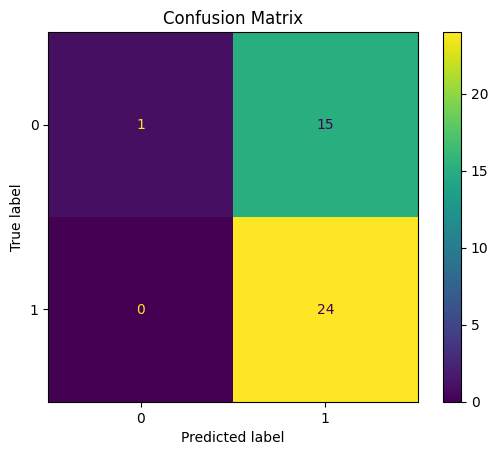

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.06      0.12        16
           1       0.62      1.00      0.76        24

    accuracy                           0.62        40
   macro avg       0.81      0.53      0.44        40
weighted avg       0.77      0.62      0.50        40



In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Predict on the test set
y_pred_time = (best_model_time.predict(X_test_time) > 0.5).astype("int32")

# Calculate test accuracy
test_accuracy_time = accuracy_score(y_test_time, y_pred_time)
print(f"Test Accuracy: {test_accuracy_time * 100:.2f}%")

# Generate the confusion matrix
conf_matrix_time = confusion_matrix(y_test_time, y_pred_time)

# Plot the confusion matrix
ConfusionMatrixDisplay(conf_matrix_time).plot(values_format='d')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
report_time = classification_report(y_test_time, y_pred_time)
print("Classification Report:")
print(report_time)

# Frequency And Hand Test Accuracy

2/2 [==============================] - 0s 6ms/step
Test Accuracy: 60.00%


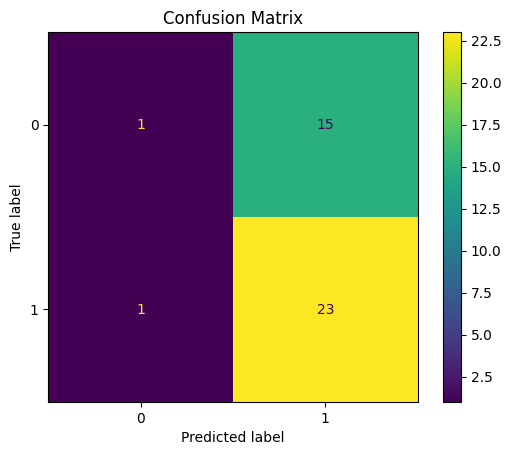

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.06      0.11        16
           1       0.61      0.96      0.74        24

    accuracy                           0.60        40
   macro avg       0.55      0.51      0.43        40
weighted avg       0.56      0.60      0.49        40



In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt


# Predict on the test set
y_pred_frequency = (best_model_frequency.predict(X_test_frequency) > 0.5).astype("int32")

# Calculate test accuracy
test_accuracy_frequency = accuracy_score(y_test_frequency, y_pred_frequency)
print(f"Test Accuracy: {test_accuracy_frequency * 100:.2f}%")

# Generate the confusion matrix
conf_matrix_frequency = confusion_matrix(y_test_frequency, y_pred_frequency)

# Plot the confusion matrix
ConfusionMatrixDisplay(conf_matrix_frequency).plot(values_format='d')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
report_frequency = classification_report(y_test_frequency, y_pred_frequency)
print("Classification Report:")
print(report_frequency)

# Combined And Hand Test Accuracy


2/2 [==============================] - 0s 7ms/step
Test Accuracy: 57.50%


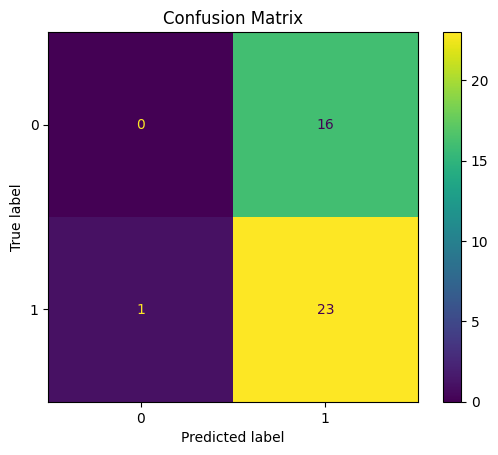

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.59      0.96      0.73        24

    accuracy                           0.57        40
   macro avg       0.29      0.48      0.37        40
weighted avg       0.35      0.57      0.44        40



In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Predict on the test set
y_pred_time_frequency = (best_model_time_frequency.predict(X_test_time_frequency) > 0.5).astype("int32")

# Calculate test accuracy
test_accuracy_time_frequency = accuracy_score(y_test_time_frequency, y_pred_time_frequency)
print(f"Test Accuracy: {test_accuracy_time_frequency * 100:.2f}%")

# Generate the confusion matrix
conf_matrix_time_frequency = confusion_matrix(y_test_time_frequency, y_pred_time_frequency)

# Plot the confusion matrix
ConfusionMatrixDisplay(conf_matrix_time_frequency).plot(values_format='d')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
report_time_frequency = classification_report(y_test_time_frequency, y_pred_time_frequency)
print("Classification Report:")
print(report_time_frequency)

# Important Position And Hand Test Accuracy

2/2 [==============================] - 0s 6ms/step
Test Accuracy: 45.00%


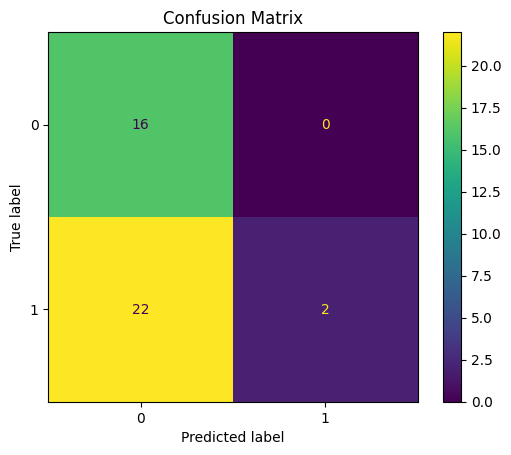

Classification Report:
              precision    recall  f1-score   support

           0       0.42      1.00      0.59        16
           1       1.00      0.08      0.15        24

    accuracy                           0.45        40
   macro avg       0.71      0.54      0.37        40
weighted avg       0.77      0.45      0.33        40



In [ ]:
# Predict on the test set
y_pred_important_positions = (best_model_important_positions.predict(X_test_important_positions) > 0.5).astype("int32")

# Calculate test accuracy
test_accuracy_important_positions = accuracy_score(y_test_important_positions, y_pred_important_positions)
print(f"Test Accuracy: {test_accuracy_important_positions * 100:.2f}%")

# Generate the confusion matrix
conf_matrix_important_positions = confusion_matrix(y_test_important_positions, y_pred_important_positions)

# Plot the confusion matrix
ConfusionMatrixDisplay(conf_matrix_important_positions).plot(values_format='d')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
report_important_positions = classification_report(y_test_important_positions, y_pred_important_positions)
print("Classification Report:")
print(report_important_positions)

# ROC curves

2/2 [==============================] - 0s 12ms/step


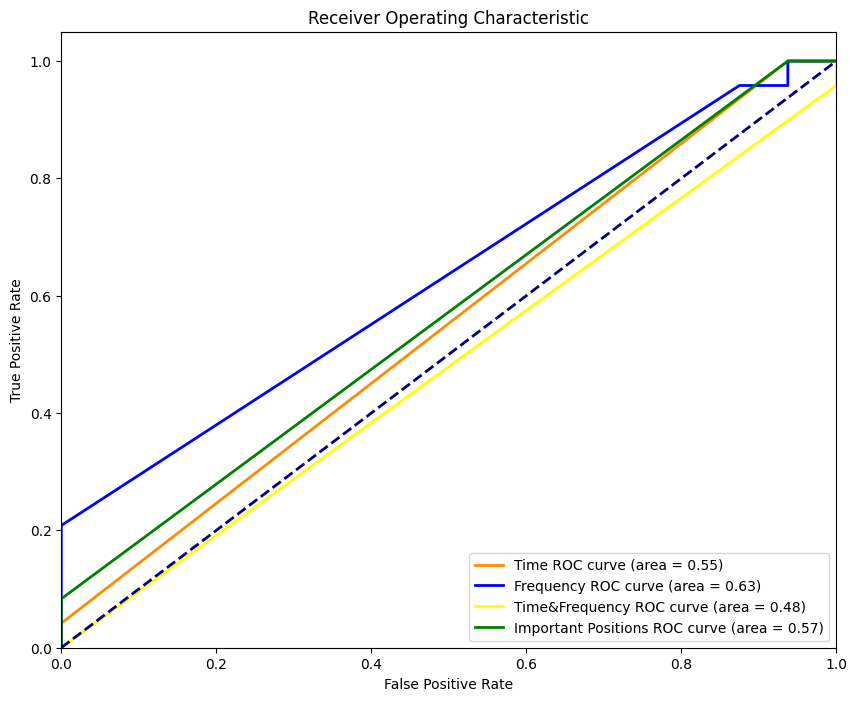

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities for the positive class for all models
y_pred_probs_time = best_model_time.predict(X_test_time).ravel()
y_pred_probs_frequency = best_model_frequency.predict(X_test_frequency).ravel()
y_pred_probs_time_frequency = best_model_time_frequency.predict(X_test_time_frequency).ravel()
y_pred_probs_important_positions = best_model_important_positions.predict(X_test_important_positions).ravel()  # New model

# Compute the ROC curve for each model
fpr_time, tpr_time, thresholds_time = roc_curve(y_test_time, y_pred_probs_time)
roc_auc_time = auc(fpr_time, tpr_time)

fpr_frequency, tpr_frequency, thresholds_frequency = roc_curve(y_test_frequency, y_pred_probs_frequency)
roc_auc_frequency = auc(fpr_frequency, tpr_frequency)

fpr_time_frequency, tpr_time_frequency, thresholds_time_frequency = roc_curve(y_test_time_frequency, y_pred_probs_time_frequency)
roc_auc_time_frequency = auc(fpr_time_frequency, tpr_time_frequency)

fpr_important_positions, tpr_important_positions, thresholds_important_positions = roc_curve(y_test_important_positions, y_pred_probs_important_positions)  # New ROC computation
roc_auc_important_positions = auc(fpr_important_positions, tpr_important_positions)  # New AUC computation

# Plot the ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_time, tpr_time, color='darkorange', lw=2, label='Time ROC curve (area = %0.2f)' % roc_auc_time)
plt.plot(fpr_frequency, tpr_frequency, color='blue', lw=2, label='Frequency ROC curve (area = %0.2f)' % roc_auc_frequency)
plt.plot(fpr_time_frequency, tpr_time_frequency, color='yellow', lw=2, label='Time&Frequency ROC curve (area = %0.2f)' % roc_auc_time_frequency)
plt.plot(fpr_important_positions, tpr_important_positions, color='green', lw=2, label='Important Positions ROC curve (area = %0.2f)' % roc_auc_important_positions)  # New curve
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()